### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv(r'D:\Users\DELL\Desktop\ML\CV Projects\AV Hackathon\train_wn75k28.csv')
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [59]:
df_test = pd.read_csv(r'D:\Users\DELL\Desktop\ML\CV Projects\AV Hackathon\test_Wf7sxXF.csv')

In [60]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [61]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

We notice two variables with high number of nan values. We will deal with them later.

In [62]:
df['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

The dataset is highly imbalanced which can affect the model performance, we'll handle this before model creation part.

### Feature Engineering & EDA

In [63]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [64]:
df_test['created_at'] = pd.to_datetime(df_test['created_at'])
df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])

In [65]:
df.dtypes

id                               int64
created_at              datetime64[ns]
campaign_var_1                   int64
campaign_var_2                   int64
products_purchased             float64
signup_date             datetime64[ns]
user_activity_var_1              int64
user_activity_var_2              int64
user_activity_var_3              int64
user_activity_var_4              int64
user_activity_var_5              int64
user_activity_var_6              int64
user_activity_var_7              int64
user_activity_var_8              int64
user_activity_var_9              int64
user_activity_var_10             int64
user_activity_var_11             int64
user_activity_var_12             int64
buy                              int64
dtype: object

In [66]:
df['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

Products purchased is a relevant parameter showing previous buying history of the lead. Here we see a lot of missing values and no values are set to zero, so here I think it is safe to assume that those missing values mean the lead has not bought a product before this. Ultimately imputing the missing values to 0.

In [67]:
diff = df['created_at'] - df['signup_date']
diff = diff/np.timedelta64(1, 'D')
df['diff'] = diff

In [68]:
diff_test = df_test['created_at'] - df_test['signup_date']
diff_test = diff_test/np.timedelta64(1, 'D')
df_test['diff'] = diff_test

Here I have created a variable named "diff" showing the difference between the date the lead dropped and when he/she signed up on the website. As there were multiple campaigns and ways to attract a lead I believe this variable can give us more insight into the activity of leads and maybe group them or relate them to the final target variable.

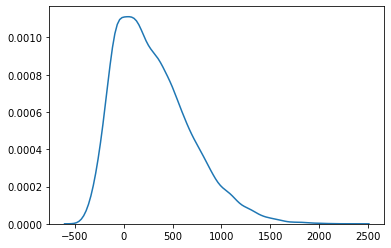

In [69]:
sns.kdeplot(diff)

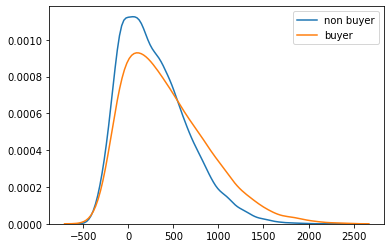

In [70]:
sns.kdeplot(df[df['buy'] == 0]['diff'], label="non buyer")
sns.kdeplot(df[df['buy'] == 1]['diff'], label='buyer')

In [71]:
df[df['diff'].isnull()]['buy'].value_counts()

0    15088
1       25
Name: buy, dtype: int64

Most of the people that don't sign up on the website (nan value for diff) are of the non buyer category. One way to handle this is to create categories - categorical variables to address or flag this missing value. 

In [72]:
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df['week'] = df['created_at'].dt.week

In [73]:
df_test['month'] = df_test['created_at'].dt.month

In [74]:
df['month'].value_counts()

12    4890
10    4685
11    4658
9     4160
8     4094
7     3540
6     3217
5     2799
4     2356
3     2048
2     1442
1     1272
Name: month, dtype: int64

grouping by month to see how the lead activity is throught the year

In [75]:
month = df.groupby(['month'])

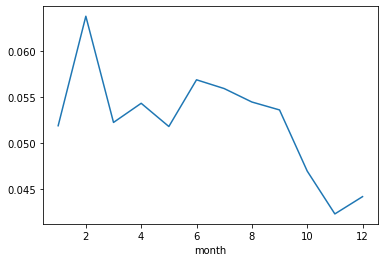

In [76]:
month['buy'].mean().plot()

From the above graph it is clear that months like february, April, June see a sharp rise in buyers as compared to their adjacent months. Overall buyers are more in the start of the year and then drops.

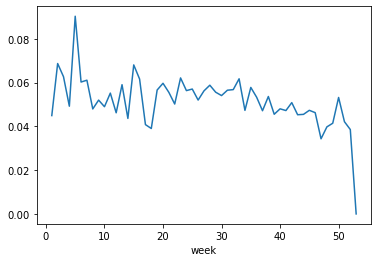

In [77]:
week = df.groupby(['week'])
week['buy'].mean().plot()

We can see a similar pattern here for the weeks.

Now we are looking at the campaign variables and how they are related to the target variable

In [78]:
camp1 = df.groupby(['campaign_var_1'])
camp2 = df.groupby(['campaign_var_2'])

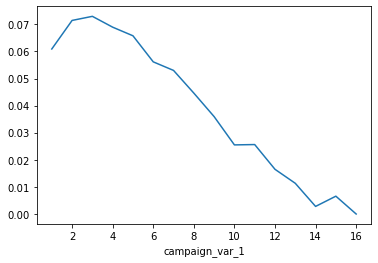

In [79]:
camp1['buy'].mean().plot()

We can see here how all the campaigns performed, The marketing team can take help from this and other factors can be studied if more information is given to us about the campaigns to better understand what is working and what is not.

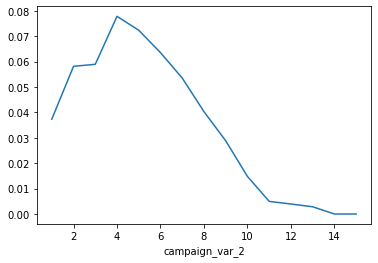

In [80]:
camp2['buy'].mean().plot()

Similar graph showing campaign variable 2 and buy variable relation

Filling the products purchased missing values with zero as thought earlier

In [81]:
df['products_purchased'].fillna(0, inplace=True)

In [82]:
df_test['products_purchased'].fillna(0, inplace=True)

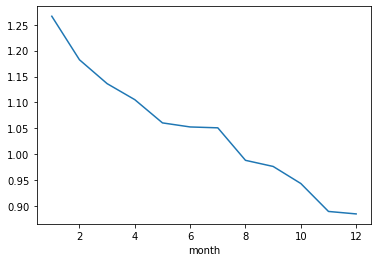

In [83]:
month['products_purchased'].mean().plot()

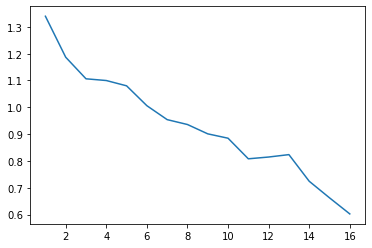

In [84]:
plt.plot(camp1['products_purchased'].mean())

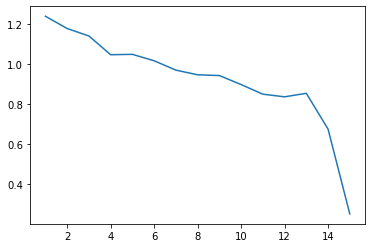

In [85]:
plt.plot(camp2['products_purchased'].mean())

Products purchased vs campaign_2 and buyers vs campaign_2 are different showing that there is some realtion and we can decode the performance of these campaigns with more info!

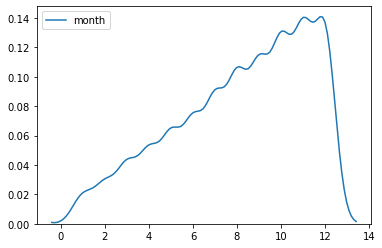

In [86]:
sns.kdeplot(df[df['diff'].isnull()]['month'])

Now looking at user_activity columns and their distribution

In [222]:
for i in range(6,18):
    print(df.columns[i])
    print(df.iloc[:, i].value_counts()/391.61)

user_activity_var_1
0    60.950946
1    38.091469
2     0.955032
3     0.002554
Name: user_activity_var_1, dtype: float64
user_activity_var_2
0    99.328413
1     0.671587
Name: user_activity_var_2, dtype: float64
user_activity_var_3
0    89.71681
1    10.28319
Name: user_activity_var_3, dtype: float64
user_activity_var_4
0    98.853451
1     1.146549
Name: user_activity_var_4, dtype: float64
user_activity_var_5
0    84.890580
1    15.068563
2     0.040857
Name: user_activity_var_5, dtype: float64
user_activity_var_6
0    53.055336
1    43.944230
2     2.962131
3     0.038303
Name: user_activity_var_6, dtype: float64
user_activity_var_7
0    71.502260
1    28.334312
2     0.163428
Name: user_activity_var_7, dtype: float64
user_activity_var_8
0    82.564286
1    17.428053
2     0.007661
Name: user_activity_var_8, dtype: float64
user_activity_var_9
0    98.856005
1     1.143995
Name: user_activity_var_9, dtype: float64
user_activity_var_10
0    99.961697
1     0.038303
Name: user_activit

We can see above that many of these columns are having very low variance (with one value in more than 95% of the dataset). So I removed all those variables where one value was highly dominant >95%. 

In [89]:
df.drop(['created_at', 'signup_date', 'user_activity_var_2', 'user_activity_var_4', 'user_activity_var_9',
        'user_activity_var_10', 'user_activity_var_12', 'year'], axis=1, inplace=True)

In [90]:
df_test.drop(['created_at', 'signup_date', 'user_activity_var_2', 'user_activity_var_4', 'user_activity_var_9',
        'user_activity_var_10', 'user_activity_var_12'], axis=1, inplace=True)

In [87]:
df_test.drop(['id'], axis=1, inplace=True)

In [88]:
df.drop(['id'], axis=1, inplace=True)

Making multiple categorical columns from diff

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.200e+01, 1.250e+02, 2.610e+02, 4.910e+02, 8.270e+02, 1.181e+03,
        1.525e+03, 1.485e+03, 1.524e+03, 1.447e+03, 1.499e+03, 1.360e+03,
        1.275e+03, 1.230e+03, 1.208e+03, 1.091e+03, 1.039e+03, 9.120e+02,
        8.170e+02, 7.380e+02, 6.210e+02, 5.450e+02, 5.190e+02, 3.990e+02,
        3.420e+02, 2.620e+02, 2.500e+02, 2.390e+02, 1.600e+02, 1.220e+02,
        1.230e+02, 9.700e+01, 7.800e+01, 4.800e+01, 4.800e+01, 3.400e+01,
        3.000e+01, 1.400e+01, 1.100e+01, 1.000e+01, 1.400e+01, 8.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([-4.4500e+02, -3.8910e+02, -3.3320e+02, -2.7730e+02, -2.2140e+02,
        -1.6550e+02, -1.0960e+02, -5.3700e+01,  2.2000e+00,  5.8100e+01,
         1.1400e+02,  1.6990e+02,  2.2580e+02,  2.8170e+02,  3.3760e+02,
         3.9350e+02,  4.4940e+02,  5.0530e+02,  5.6120e+02,  6.1710e+02,
         6.7300e+02,  7.2890e+02,  7.8480e+02,  8.4070e+02,  8.9660e+02,
         9.

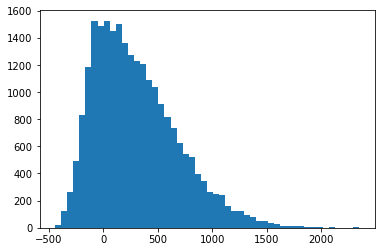

In [91]:
plt.hist(df['diff'], bins=50)

In [92]:
category = []
for i in range(df.shape[0]):
    if df['diff'][i] <= 250 and df['diff'][i] > 0:
        category.append("Signed up within 250 days")
    elif df['diff'][i] <= 0:
        category.append("Signed up before lead dropped")  
    elif df['diff'][i] <= 500 and df['diff'][i] > 250:
        category.append("Signed up between 250 and 500 days")
    elif df['diff'][i] > 500:
        category.append("Signed up after 500 days")
    else:
        category.append("Didn't sign up")

These categories were roughly thought based on the distriubtion of the variable so that enough values are present in every category.

In [93]:
df['category'] = category

In [94]:
df['category'].value_counts()

Didn't sign up                        15113
Signed up after 500 days               6544
Signed up within 250 days              6456
Signed up before lead dropped          5866
Signed up between 250 and 500 days     5182
Name: category, dtype: int64

In [95]:
category = []
for i in range(df_test.shape[0]):
    if df_test['diff'][i] <= 250 and df_test['diff'][i] > 0:
        category.append("Signed up within 250 days")
    elif df_test['diff'][i] <= 0:
        category.append("Signed up before lead dropped")  
    elif df_test['diff'][i] <= 500 and df_test['diff'][i] > 250:
        category.append("Signed up between 250 and 500 days")
    elif df_test['diff'][i] > 500:
        category.append("Signed up after 500 days")
    else:
        category.append("Didn't sign up")

In [96]:
df_test['category'] = category

In [97]:
df = pd.get_dummies(df, columns=['category'], drop_first=True)

In [98]:
df_test = pd.get_dummies(df_test, columns=['category'], drop_first=True)

Looking at the correlation between the variables

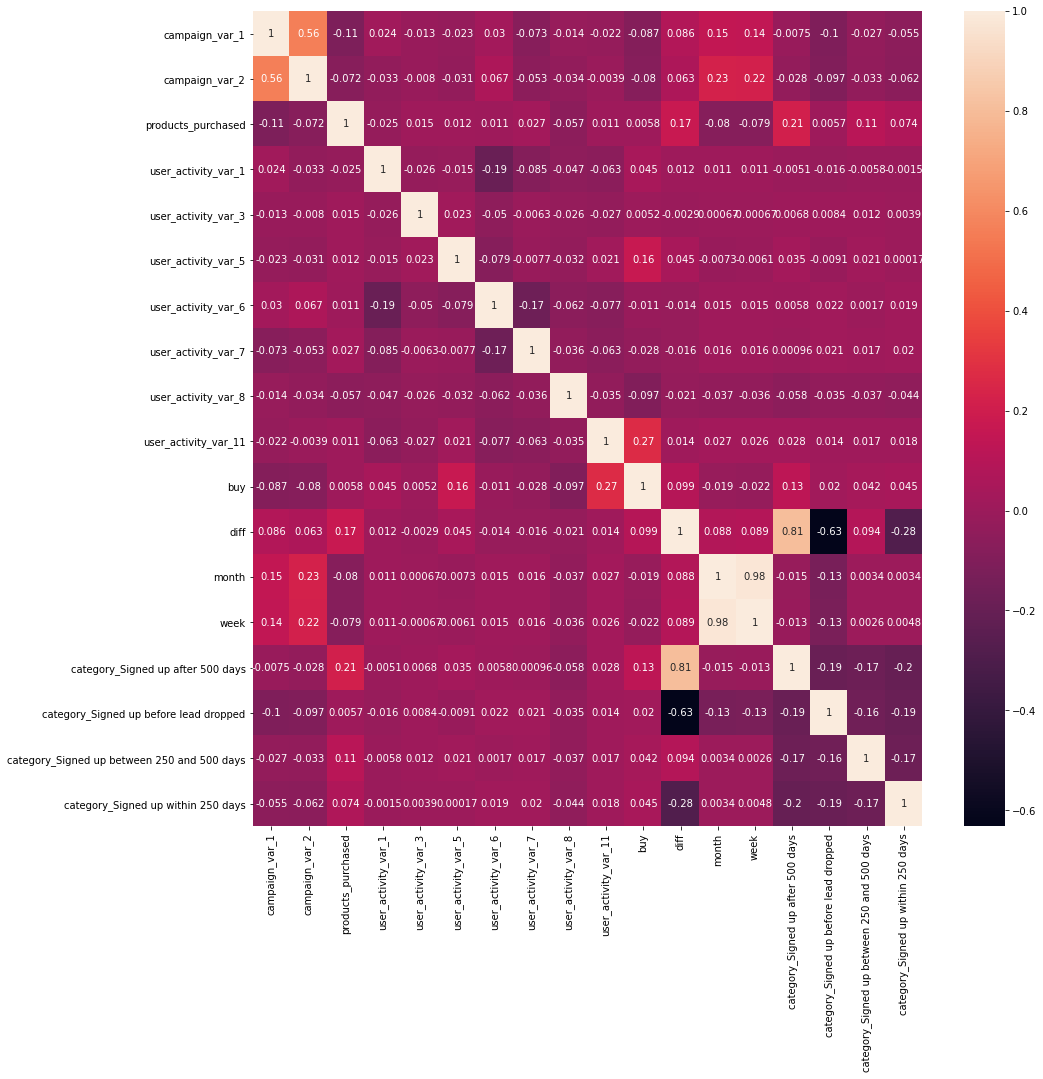

In [99]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Here we remove highly correlated variables, also we notice some variables having high correlation with the target variable like user_activity_11, detailed study can be made here. Their relation will be more evident from the pairplot.

In [100]:
df.drop(['week'], axis=1, inplace=True)

In [101]:
df.drop(['diff'], axis=1, inplace=True)
df_test.drop(['diff'], axis=1, inplace=True)

In [102]:
x = df.drop(['buy'], axis=1)
y = df['buy']

Making pairplots to better understand the distribution

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

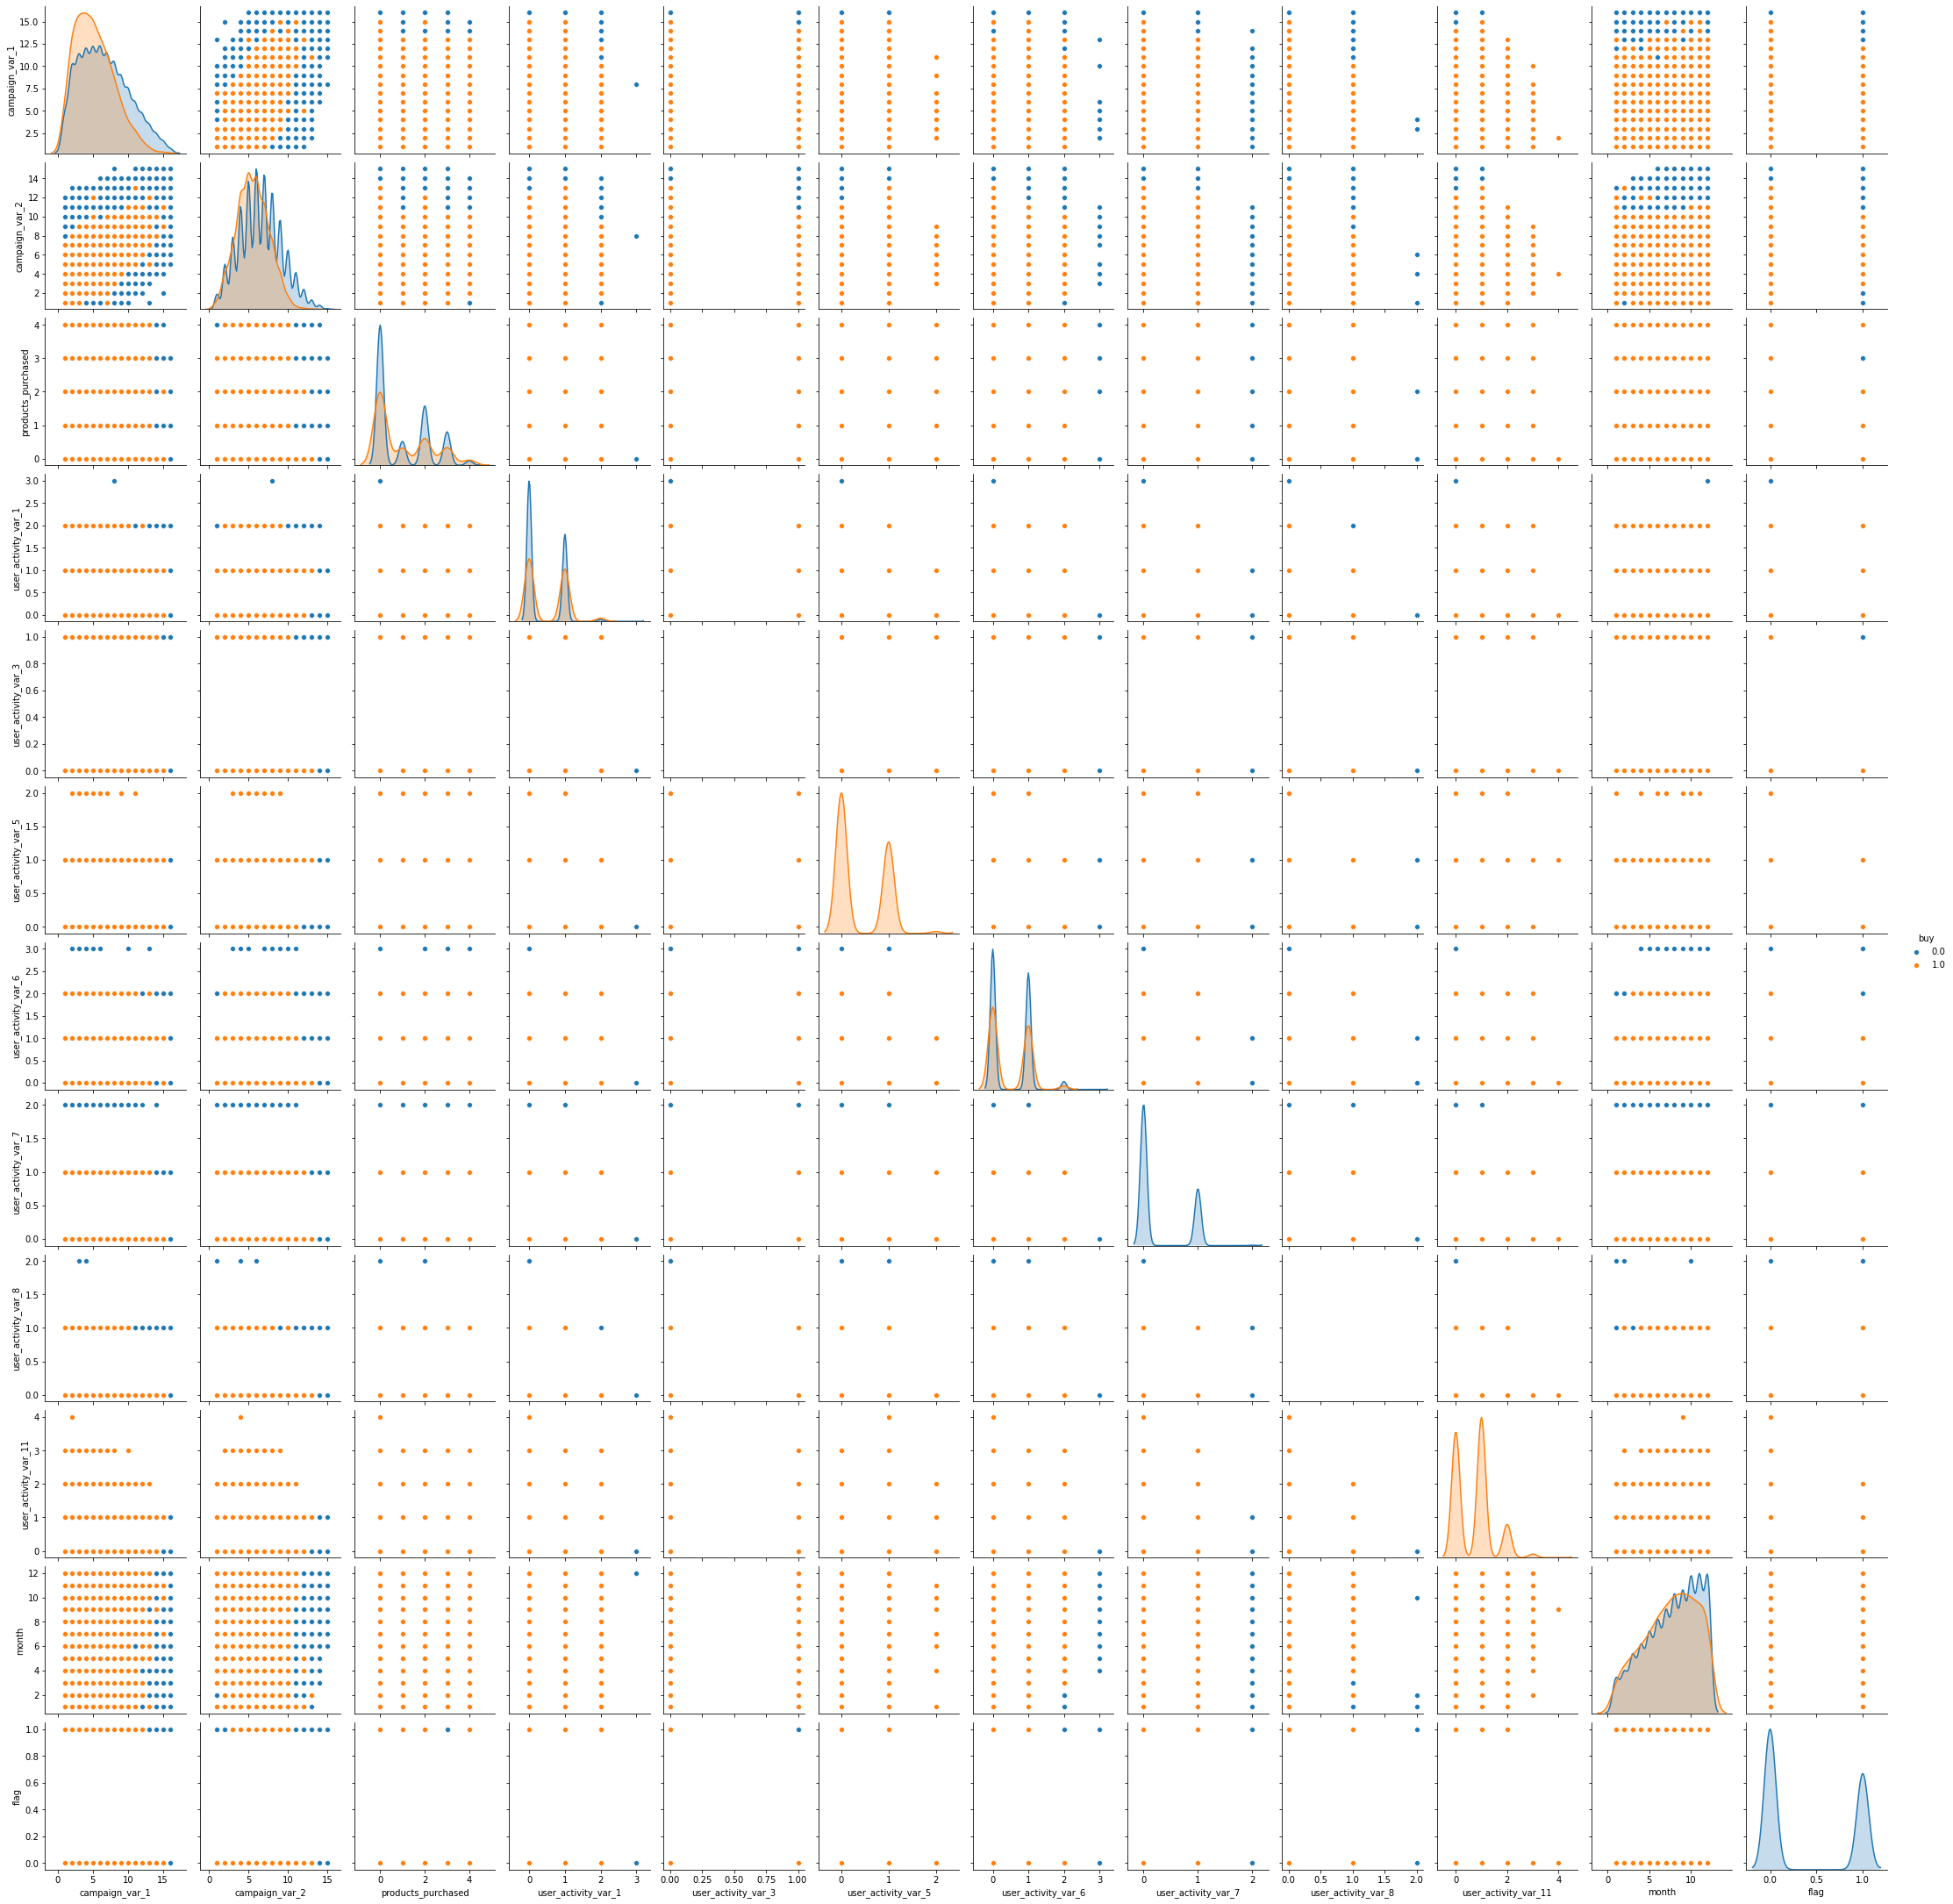

In [298]:
sns.pairplot(df, hue='buy')

We can see from the above plots that the data can't be linearly separated so algorithms like Linear Regression and Svm with linear Kernal won't work well. Ensemble algorithms on the other hand may work fine.

In [310]:
import imblearn

As the dataset is highly imbalanced, Using oversampling.

In [103]:
from imblearn.over_sampling import RandomOverSampler
OS = RandomOverSampler(sampling_strategy=0.2)

X_Train_Res, Y_Train_Res = OS.fit_resample(x, y)

In [104]:
X_Train_Res.shape, Y_Train_Res.shape

((44595, 15), (44595,))

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Splitting the dataset in train test

In [106]:
xTrain, xTest, yTrain, yTest = train_test_split(X_Train_Res, Y_Train_Res, test_size=0.1)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(40135, 15) (4460, 15) (40135,) (4460,)


In [107]:
# standardization
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [108]:
df_test = scaler.transform(df_test)

In [112]:
#loading machine learning modules 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score

In [110]:
# we will check for which model is better with rmse score .
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [113]:
for i in [knn, svc, rf, xgb]:
    i.fit(xTrain, yTrain)
    yPred = i.predict(xTest)
    print(i)
    print(f1_score(yTest, yPred))
    print(confusion_matrix(yTest, yPred))
    print(classification_report(yTest, yPred))
    print("ROC_AUC:", roc_auc_score(yTest, yPred))
    print("-----------------------------------------")

KNeighborsClassifier()
0.7578027465667915
[[3465  259]
 [ 129  607]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3724
           1       0.70      0.82      0.76       736

    accuracy                           0.91      4460
   macro avg       0.83      0.88      0.85      4460
weighted avg       0.92      0.91      0.92      4460

ROC_AUC: 0.877589694344557
-----------------------------------------
SVC()
0.6096528365791702
[[3639   85]
 [ 376  360]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3724
           1       0.81      0.49      0.61       736

    accuracy                           0.90      4460
   macro avg       0.86      0.73      0.78      4460
weighted avg       0.89      0.90      0.89      4460

ROC_AUC: 0.733152757670574
-----------------------------------------
RandomForestClassifier()
0.9496021220159151
[[3668   56]
 [  20  716]]
              pr

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.7047332832456799
[[3598  126]
 [ 267  469]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3724
           1       0.79      0.64      0.70       736

    accuracy                           0.91      4460
   macro avg       0.86      0.80      0.83      4460
weighted avg       0.91      0.91      0.91 

We see that random forest is working best for our case, so now we tune it's hyperparameters

In [358]:
parameters = {'n_estimators' : [100, 200, 500, 50],
             'class_weight' : ["balanced", None],
             'criterion' : ['gini', 'entropy']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, scoring='f1')
clf.fit(xTrain, yTrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 500, 50]},
             scoring='f1')

In [359]:
clf.cv_results_

{'mean_fit_time': array([ 2.9594583 ,  5.56075106, 14.43312669,  1.49189119,  3.16963277,
         6.29797392, 14.41136513,  1.67842789,  2.84351764,  5.97877111,
        13.9119648 ,  1.36557717,  2.76338949,  6.78316479, 16.14518743,
         1.54929471]),
 'std_fit_time': array([0.34106518, 0.17914511, 0.4226361 , 0.07730716, 0.25135254,
        0.27125901, 0.35735355, 0.19448747, 0.24379838, 0.37782927,
        0.47876173, 0.0793603 , 0.07145118, 1.35758905, 0.48680274,
        0.05625079]),
 'mean_score_time': array([0.25128045, 0.45192327, 1.13546004, 0.10770469, 0.20498142,
        0.53771911, 1.21263208, 0.14315186, 0.26090302, 0.46010356,
        1.21833634, 0.11722555, 0.21105161, 0.60673757, 1.22245483,
        0.12896032]),
 'std_score_time': array([0.04630771, 0.06068402, 0.08309607, 0.00878859, 0.00945072,
        0.07480644, 0.08214423, 0.02382915, 0.04244814, 0.0401196 ,
        0.067072  , 0.02274052, 0.022853  , 0.24143123, 0.03599758,
        0.03987092]),
 'param_cl

The following are the best parameters and a F1 score of 0.92 is obtained for the test set.

In [439]:
rf_final = RandomForestClassifier(class_weight= 'balanced', criterion = 'gini', n_estimators = 500)
rf_final.fit(xTrain, yTrain)
yPred = rf_final.predict(xTest)
print(f1_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

0.9293308317698561
[[3604   96]
 [  17  743]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      3700
         1.0       0.89      0.98      0.93       760

    accuracy                           0.97      4460
   macro avg       0.94      0.98      0.96      4460
weighted avg       0.98      0.97      0.98      4460



The predictions are stored in a csv file and submitted on the website.

In [ ]:
yrf = rf.predict(df_test)
pd.DataFrame(yrf).to_csv(r'D:\Users\DELL\Desktop\ML\CV Projects\AV Hackathon\submission_rf.csv', index=False)

Thank you!